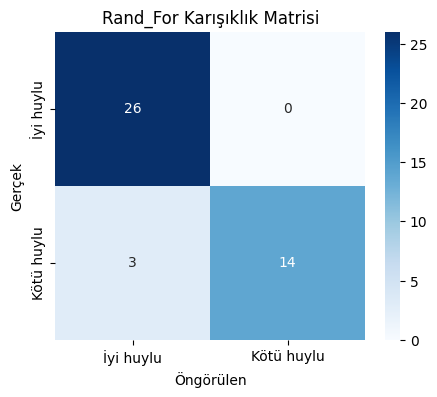

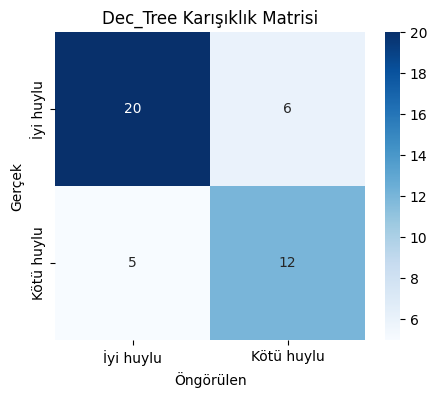

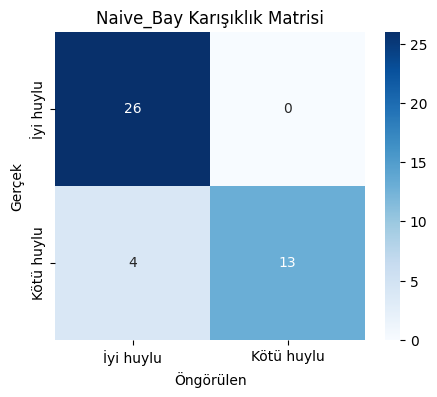

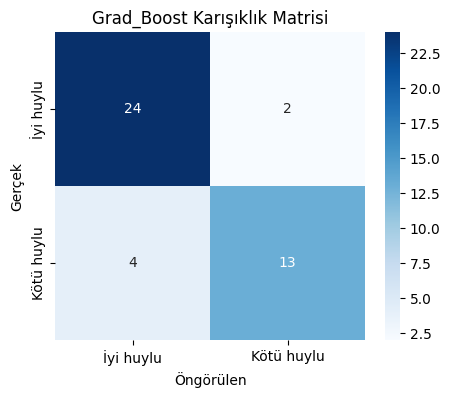

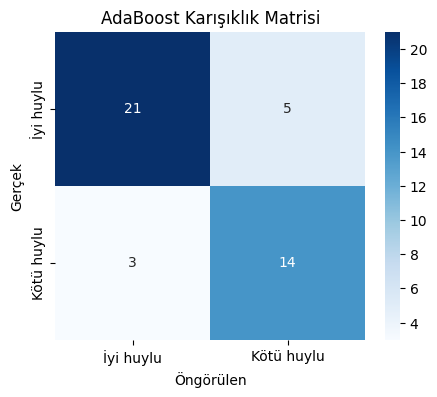

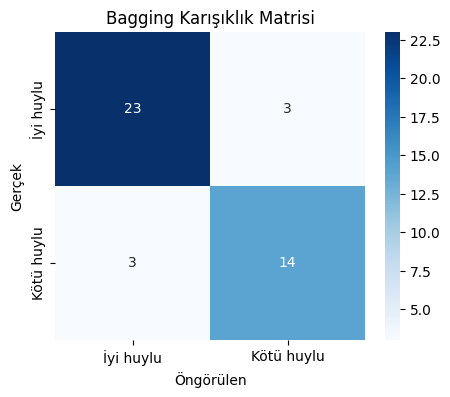

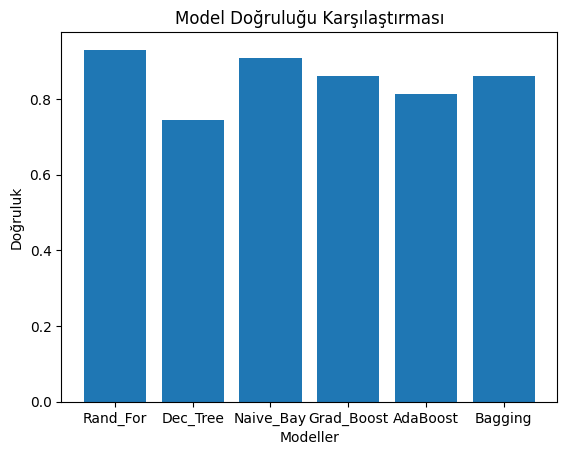

/tmp/ipykernel_19/2463472668.py:68: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({"Benign": 0, "Malignant": 1})
/tmp/ipykernel_19/2463472668.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({"Benign": 0, "Malignant": 1})


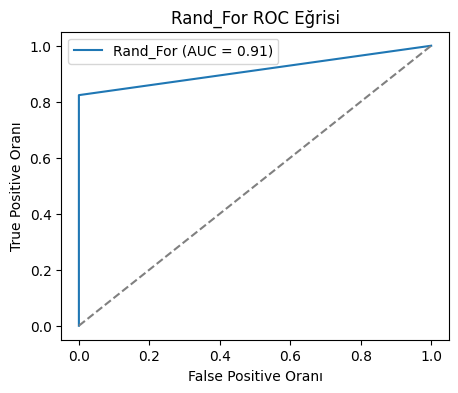

/tmp/ipykernel_19/2463472668.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_metrics_df = pd.concat([performance_metrics_df, pd.DataFrame({


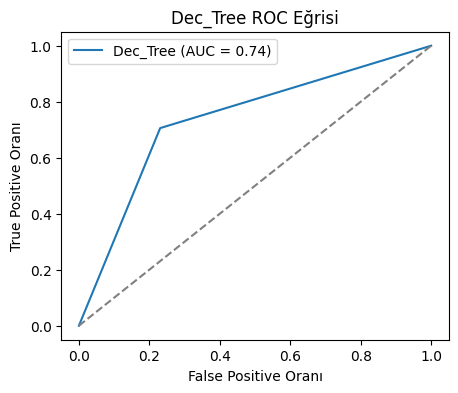

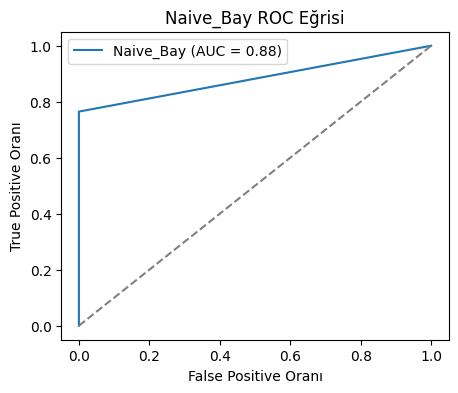

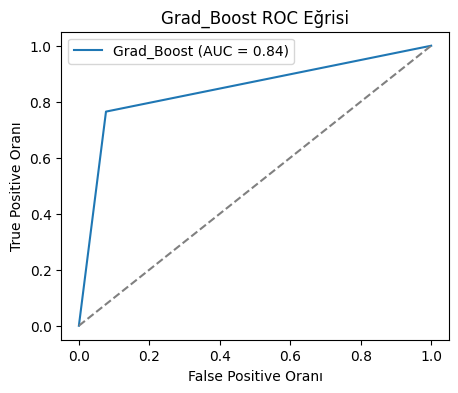

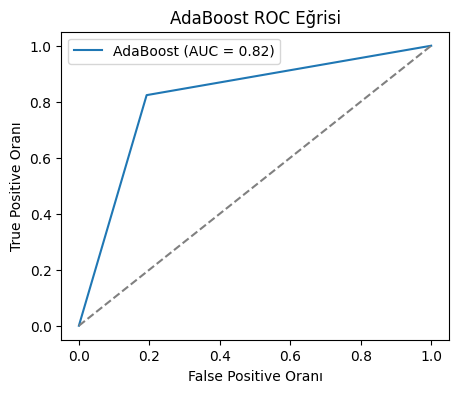

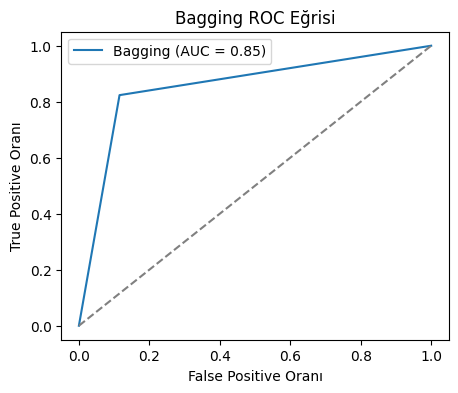

        Model  Doğruluk  Hassasiyet  Geri Çağırma  F1 Puanı   ROC AUC
0    Rand_For  0.930233    1.000000      0.823529  0.903226  0.911765
1    Dec_Tree  0.744186    0.666667      0.705882  0.685714  0.737557
2   Naive_Bay  0.906977    1.000000      0.764706  0.866667  0.882353
3  Grad_Boost  0.860465    0.866667      0.764706  0.812500  0.843891
4    AdaBoost  0.813953    0.736842      0.823529  0.777778  0.815611
5     Bagging  0.860465    0.823529      0.823529  0.823529  0.854072


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Veri setini oku
data = pd.read_csv("/kaggle/input/breast-cancer-prediction/breast-cancer-dataset.csv")

# Bağımsız değişkenleri X'e ve hedef değişkeni y'e ayır
X = data.iloc[:, 2:10]  # Bağımsız değişkenlerin indeksleri 2'den başlar
y = data.iloc[:, -1]    # Hedef değişkeni (son sütun)

# Kategorik değişkenleri sayısal verilere dönüştür
X = pd.get_dummies(X)

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeller ve isimleri tek bir listede gruplandırılır
models = [
    ("Rand_For", RandomForestClassifier(random_state=42)),
    ("Dec_Tree", DecisionTreeClassifier(random_state=42)),
    ("Naive_Bay", GaussianNB()),
    ("Grad_Boost", GradientBoostingClassifier(random_state=42)),
    ("AdaBoost", AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)),
    ("Bagging", BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42))
]

# Doğruluk değerleri ve karışıklık matrisleri
accuracies = []
cms = []

# Modelleri değerlendir
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracies.append(acc)
    cms.append((name, cm))

    # Karışıklık matrisini görselleştir
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["İyi huylu", "Kötü huylu"], yticklabels=["İyi huylu", "Kötü huylu"])
    plt.title(f"{name} Karışıklık Matrisi")
    plt.xlabel("Öngörülen")
    plt.ylabel("Gerçek")
    plt.show()

# Doğruluk değerlerini görselleştir
plt.bar([name for name, _ in models], accuracies)
plt.title("Model Doğruluğu Karşılaştırması")
plt.xlabel("Modeller")
plt.ylabel("Doğruluk")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Performans metriklerini tutacak DataFrame oluştur
performance_metrics_df = pd.DataFrame(columns=["Model", "Doğruluk", "Hassasiyet", "Geri Çağırma", "F1 Puanı", "ROC AUC"])

# Hedef değişkenin kategorik değerlerini sayısal değerlere dönüştür
y_train = y_train.replace({"Benign": 0, "Malignant": 1})
y_test = y_test.replace({"Benign": 0, "Malignant": 1})

# Modelleri değerlendir
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    
    # ROC eğrisini görselleştir
    plt.figure(figsize=(5, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"{name} ROC Eğrisi")
    plt.xlabel("False Positive Oranı")
    plt.ylabel("True Positive Oranı")
    plt.legend()
    plt.show()
    
    # DataFrame'e ekle
    performance_metrics_df = pd.concat([performance_metrics_df, pd.DataFrame({
        "Model": [name],
        "Doğruluk": [acc],
        "Hassasiyet": [precision],
        "Geri Çağırma": [recall],
        "F1 Puanı": [f1],
        "ROC AUC": [roc_auc]
    })], ignore_index=True)

# Performans metriklerini yazdır
print(performance_metrics_df)